In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
"""for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""


"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2
from keras import Layer, layers, Model

2024-06-29 20:34:18.750608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-29 20:34:18.750720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-29 20:34:18.885550: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# EDA

I'm learning about vision transformers. I think a good way to propertly study is to implement from scratch. I hope you enjoy!

In [3]:
df = pd.read_csv("/kaggle/input/nih-chest-x-rays-bbox-version/Data_Entry_2017.csv")
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [4]:
bbox = pd.read_csv("/kaggle/input/nih-chest-x-rays-bbox-version/BBox_List_2017.csv")
bbox

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,NaN,NaN,NaN


In [5]:
df_tf = pd.read_csv("/kaggle/input/nih-chest-x-rays-bbox-version/tensorflow.csv")
df_tf

,filename,width,height,class,xmin,ymin,xmax,ymax
0,00000032_037.png,1024,1024,Infiltrate,339.166138,119.195767,511.458201,470.281481
1,00000072_000.png,1024,1024,Atelectasis,356.503704,567.805291,484.368254,650.158730
2,00000147_001.png,1024,1024,Atelectasis,617.650794,599.229630,718.425397,779.106878
3,00000149_006.png,1024,1024,Atelectasis,603.661017,460.239556,853.152542,550.273454
4,00000150_002.png,1024,1024,Pneumonia,601.396825,595.978836,817.032804,776.939683
...,...,...,...,...,...,...,...,...
979,00030634_000.png,1024,1024,Effusion,141.653333,611.309045,459.093333,708.020156
980,00030635_001.png,1024,1024,Atelectasis,576.542373,490.612437,817.355932,712.985318
981,00030636_004.png,1024,1024,Infiltrate,612.693333,459.984601,836.835556,593.104601
982,00030636_004.png,1024,1024,Atelectasis,611.953785,440.509635,770.104896,591.834080


In [6]:
labels = pd.read_csv("/kaggle/input/nih-chest-x-rays-bbox-version/label.csv").label.tolist()
labels

['Infiltrate',
 'Atelectasis',
 'Pneumonia',
 'Cardiomegaly',
 'Effusion',
 'Pneumothorax',
 'Mass',
 'Nodule']

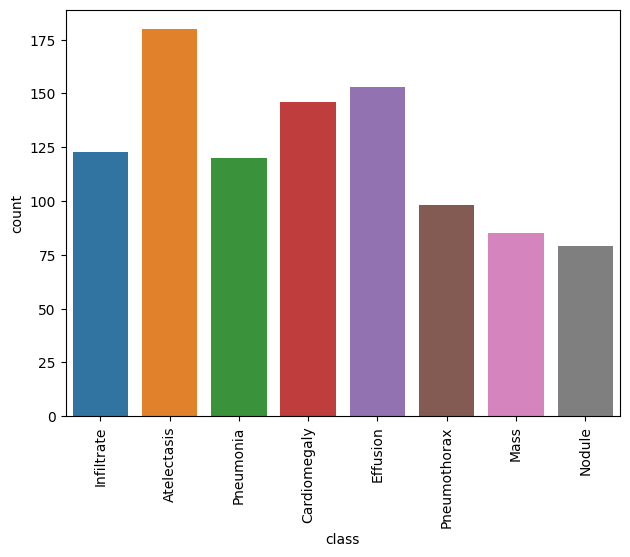

In [7]:
sns.countplot(df_tf, x="class")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [8]:
def sample_by_type(class_name):
    sample_length = 4
    sample = df_tf[df_tf["class"] == class_name].sample(sample_length)
    for i in range(sample_length):
        plt.subplot(2, 2, i+1)
        img = mpimg.imread(f'/kaggle/input/nih-chest-x-rays-bbox-version/bbox_img/{sample.iloc[i].filename}')
        plt.title(sample.iloc[i].filename)
        plt.imshow(img)
    plt.suptitle(class_name)
    plt.tight_layout()
    plt.axis("off")
    plt.show()

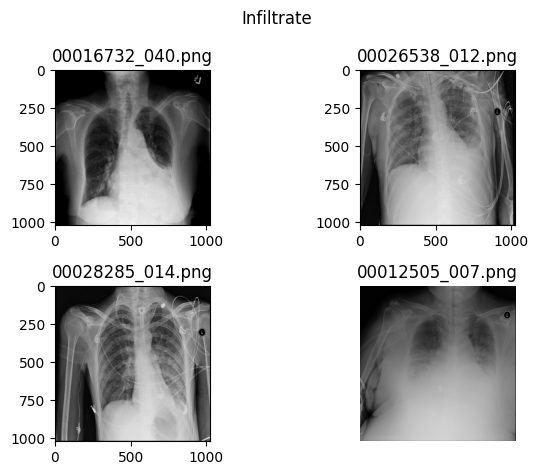

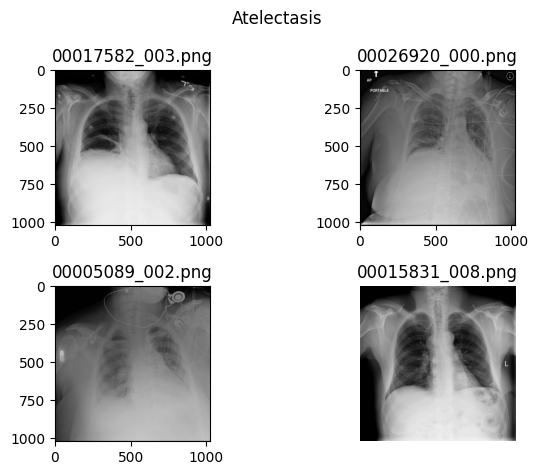

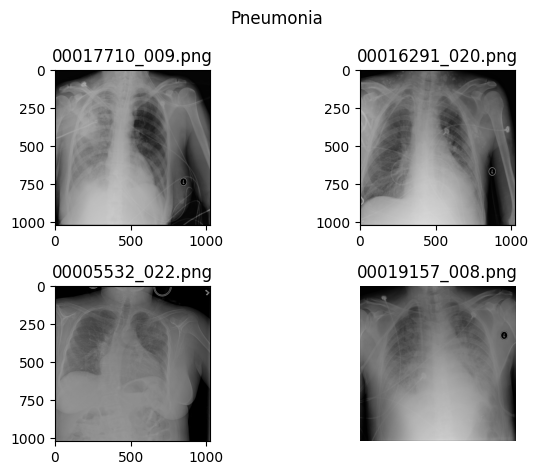

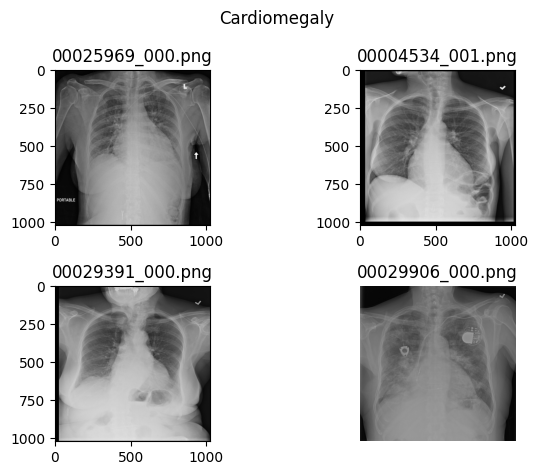

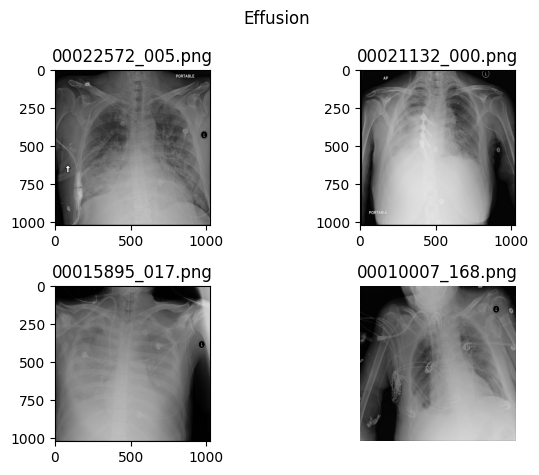

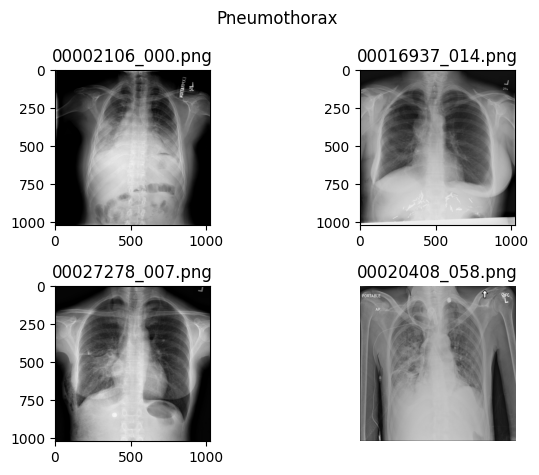

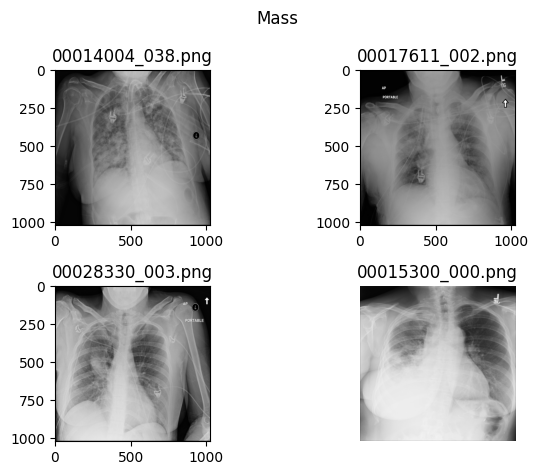

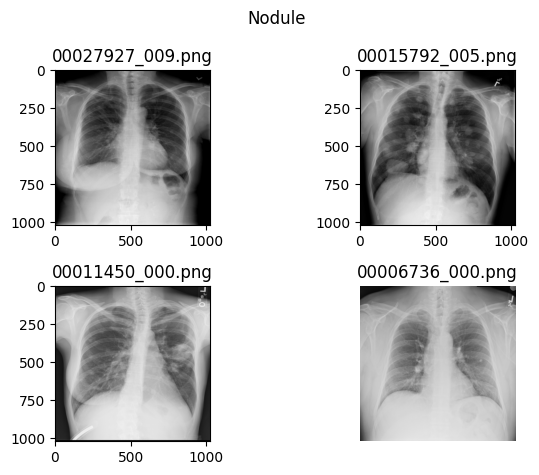

In [9]:
for label in labels:
    sample_by_type(label)

## Patches encoder

I use tf to extract patches and reshape. Just as a toy function

In [10]:
image = cv2.imread("/kaggle/input/nih-chest-x-rays-bbox-version/bbox_img/00000150_002.png")
image = cv2.resize(image, (256, 256))
images = tf.expand_dims(image, axis=0)
patch_size = 16
patches = tf.image.extract_patches(images=images,
                           sizes=[1, patch_size, patch_size, 1],
                           strides=[1, patch_size, patch_size, 1],
                           rates=[1, 1, 1, 1],
                           padding='VALID')

In [11]:
original_shape = patches.shape
patches = tf.reshape(patches, (patches.shape[0], -1, patches.shape[-1]))
patches.shape 

TensorShape([1, 256, 768])

That's how it seems

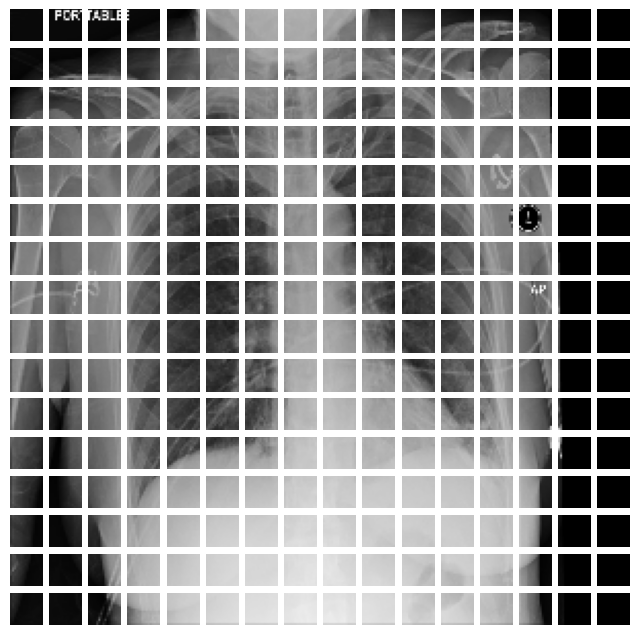

In [12]:
plt.figure(figsize=(8,8))

for i in range(original_shape[1] * original_shape[2]):
    ax = plt.subplot(original_shape[1], original_shape[2], i+1)
    plt.imshow(tf.reshape(patches[0, i,:], (patch_size, patch_size, 3)))
    plt.axis("off")

Now I build a layer to patch encode using a Dense layer and a positional Embedding

In [13]:
class PatchEncoder(Layer):
    def __init__(self, N_PATCHES, HIDDEN_SIZE):
        super(PatchEncoder, self).__init__(name = "patch_encoder")
        self.N_PATCHES = N_PATCHES
        self.linear_projection = layers.Dense(HIDDEN_SIZE)
        self.positional_embedding = layers.Embedding(N_PATCHES, HIDDEN_SIZE)
    def call(self, x):
        patches = tf.image.extract_patches(images=x,
                           sizes=[1, patch_size, patch_size, 1],
                           strides=[1, patch_size, patch_size, 1],
                           rates=[1, 1, 1, 1],
                           padding='VALID')
        patches = tf.reshape(patches, (tf.shape(patches)[0], 256, patches.shape[-1]))
        embedding_input = tf.range(start = 0, limit = self.N_PATCHES, delta = 1)
        output = self.linear_projection(patches) + self.positional_embedding(embedding_input)
        return output

Okay it looks well. Now a transformer encoder. Using Layer normalizations, MultHeadAttention and Dense layers

In [15]:
class TransformerEncoder(Layer):
    def __init__(self, N_HEADS, HIDDEN_SIZE):
        super(TransformerEncoder, self).__init__(name = "transformer_encoder")
        self.layer_norm_1 = layers.LayerNormalization()
        self.layer_norm_2 = layers.LayerNormalization()
        self.multi_head_att = layers.MultiHeadAttention(N_HEADS, HIDDEN_SIZE)
        self.dense_1 = layers.Dense(HIDDEN_SIZE, activation = tf.nn.gelu)
        self.dense_2 = layers.Dense(HIDDEN_SIZE, activation = tf.nn.gelu)
    def call(self, input_x):
        x = self.layer_norm_1(input_x)
        x = self.multi_head_att(x, x)
        x_added = layers.Add()([x, input_x])
        x = self.layer_norm_2(x_added)
        x = self.dense_1(x)
        output = self.dense_2(x)
        output = layers.Add()([output, x_added])
        return output

In [16]:
trans_enc = TransformerEncoder(8, 768)
trans_enc(tf.zeros([1, 256, 768]))

<tf.Tensor: shape=(1, 256, 768), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)>

Now I build the ViT model

In [17]:
class ViT(Model):
    def __init__(self, N_HEADS, HIDDEN_SIZE, NUM_PATCHES, N_LAYERS, N_DENSE_UNITS):
        super(ViT, self).__init__(name="vision_transformer")
        self.N_LAYERS = N_LAYERS
        self.patch_encoder = PatchEncoder(NUM_PATCHES, HIDDEN_SIZE)
        self.trans_encoders = [TransformerEncoder(N_HEADS, HIDDEN_SIZE) for _ in range(N_LAYERS)]
        self.dense_1 = layers.Dense(N_DENSE_UNITS, tf.nn.gelu)
        self.dense_2 = layers.Dense(N_DENSE_UNITS, tf.nn.gelu)
        self.dense_3 = layers.Dense(len(labels), activation="softmax")
        
    def call(self, input_x, training=True):
        x = self.patch_encoder(input_x)
        for i in range(self.N_LAYERS):
            x = self.trans_encoders[i](x)
        x = layers.Flatten()(x)
        x = self.dense_1(x)
        x = self.dense_2(x)
        output = self.dense_3(x)
        return output

In [18]:
vit = ViT(
    N_HEADS = 4,
    HIDDEN_SIZE = 768,
    NUM_PATCHES = 256,
    N_LAYERS = 2,
    N_DENSE_UNITS = 128)
vit(tf.zeros([1, 256, 256, 3]))

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[0.12186054, 0.15755245, 0.08115399, 0.13082555, 0.11139561,
        0.13301665, 0.13083957, 0.13335562]], dtype=float32)>

In [19]:
vit.summary()

Model: "vision_transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ patch_encoder (PatchEncoder)    │ ?                      │       787,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder             │ ?                      │    10,631,424 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder             │ ?                      │    10,631,424 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │    25,165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,233,544 (180.18 MB)

 Trainable params: 47,233,544 (180.18 MB)

 Non-trainable params: 0 (0.00 B)

Let's compile the model

In [20]:
from keras.metrics import CategoricalAccuracy, Precision, Recall, AUC
from keras.losses import CategoricalCrossentropy
vit.compile(optimizer = "adam", loss = CategoricalCrossentropy(label_smoothing=0.1), metrics = [CategoricalAccuracy(), Precision(), Recall(), AUC()])

# Import images

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
idg = ImageDataGenerator(
    validation_split=0.2,
    rescale=1/255.0,
)
train_gen = idg.flow_from_dataframe(df_tf, directory = "/kaggle/input/nih-chest-x-rays-bbox-version/bbox_img/",
                        x_col='filename', y_col="class", class_mode='categorical', subset="training")
val_gen = idg.flow_from_dataframe(df_tf, directory = "/kaggle/input/nih-chest-x-rays-bbox-version/bbox_img/",
                        x_col='filename', y_col="class", class_mode='categorical', subset="validation")


Found 788 validated image filenames belonging to 8 classes.
Found 196 validated image filenames belonging to 8 classes.


# Train model

Some usual callbacks

In [23]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=4
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 0.00001
)
logger = callbacks.CSVLogger(
    filename="/kaggle/working/history.csv",
    separator=",", append=False
),

And let's train

In [24]:
vit.fit(train_gen, validation_data = val_gen, epochs = 50, verbose = 1, batch_size  = 16,
        callbacks=[early_stopping, reduce_lr, logger])

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1719693323.201354      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719693323.226059      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 7/25 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - auc: 0.5172 - categorical_accuracy: 0.1477 - loss: 232.7464 - precision: 0.1401 - recall: 0.1012   

W0000 00:00:1719693334.942631      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - auc: 0.5123 - categorical_accuracy: 0.1417 - loss: 342.4138 - precision: 0.1405 - recall: 0.1229 - val_auc: 0.5224 - val_categorical_accuracy: 0.1480 - val_loss: 56.7075 - val_precision: 0.1480 - val_recall: 0.1480 - learning_rate: 0.0010
Epoch 2/50


W0000 00:00:1719693360.044336      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 915ms/step - auc: 0.5094 - categorical_accuracy: 0.1433 - loss: 71.2534 - precision: 0.1439 - recall: 0.1433 - val_auc: 0.5304 - val_categorical_accuracy: 0.1837 - val_loss: 235.2893 - val_precision: 0.1837 - val_recall: 0.1837 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 940ms/step - auc: 0.4920 - categorical_accuracy: 0.1193 - loss: 113.5285 - precision: 0.1195 - recall: 0.1193 - val_auc: 0.5431 - val_categorical_accuracy: 0.1684 - val_loss: 29.6190 - val_precision: 0.1692 - val_recall: 0.1684 - learning_rate: 0.0010
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 917ms/step - auc: 0.5069 - categorical_accuracy: 0.1303 - loss: 29.4339 - precision: 0.1311 - recall: 0.1303 - val_auc: 0.5031 - val_categorical_accuracy: 0.1276 - val_loss: 5.7719 - val_precision: 0.1463 - val_recall: 0.1224 - learning_rate: 0.0010
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 916ms/step - auc: 0.5312 - categorical_accuracy: 0.1606 - loss: 9.3529 - precision: 0.162

In [25]:
results = pd.read_csv("/kaggle/working/history.csv")
results

,epoch,auc,categorical_accuracy,learning_rate,loss,precision,recall,val_auc,val_categorical_accuracy,val_loss,val_precision,val_recall
0,0,0.509061,0.138325,0.0010,294.846863,0.138889,0.133249,0.522368,0.147959,56.707470,0.147959,0.147959
1,1,0.503869,0.129442,0.0010,85.849144,0.129771,0.129442,0.530406,0.183673,235.289276,0.183673,0.183673
2,2,0.506899,0.130711,0.0010,75.413727,0.130877,0.130711,0.543075,0.168367,29.618992,0.169231,0.168367
3,3,0.515385,0.142132,0.0010,22.772024,0.143959,0.142132,0.503137,0.127551,5.771930,0.146341,0.122449
4,4,0.534410,0.154822,0.0010,7.737230,0.155963,0.129442,0.470323,0.122449,3.780403,0.125000,0.020408
5,5,0.504495,0.130711,0.0010,2.501533,0.171717,0.021574,0.487477,0.081633,2.126398,0.000000,0.000000
6,6,0.521049,0.137056,0.0010,2.076399,1.000000,0.001269,0.497471,0.081633,2.080445,0.000000,0.000000
7,7,0.546003,0.137056,0.0010,2.073250,0.000000,0.000000,0.500831,0.081633,2.080845,0.000000,0.000000
8,8,0.561458,0.131980,0.0010,2.070059,1.000000,0.001269,0.537427,0.091837,2.080422,0.000000,0.000000
9,9,0.571342,0.171320,0.0010,2.067558,1.000000,0.001269,0.546009,0.091837,2.077927,0.000000,0.000000
